In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

UU_YELLOW = "#FFCD00"
UU_RED = "#C00A35"
UU_CREME = "#FFE6AB"
UU_ORANGE = "#F3965E"
UU_BURGUNDY = "#AA1555"
UU_BROWN = "#6E3B23"
UU_PAL = sns.color_palette([UU_YELLOW, UU_RED, UU_CREME, UU_ORANGE, UU_BURGUNDY, UU_BROWN]) # Make pallete

In [8]:
# Load csv file

fp = "UCI_Credit_Card.csv"

df = pd.read_csv(fp)
# Drop the ID column
df = df.drop(columns=["ID"])
# Drop rows where MARRIAGE is not in {1, 2}, ignoring 0 as it should not exist and ignoring 3 which is other
df = df[df["MARRIAGE"].isin([1, 2])]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


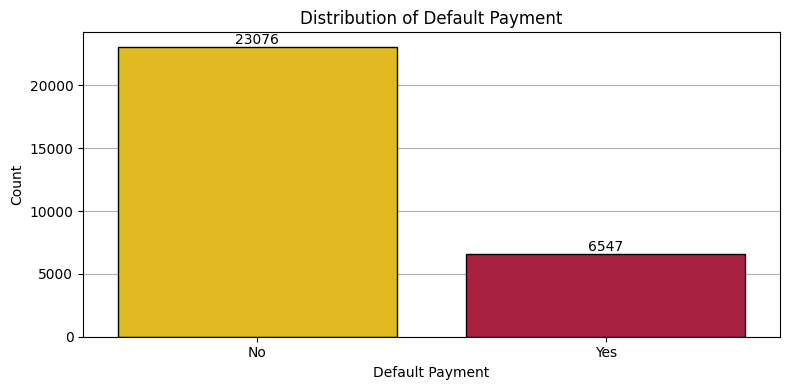

In [9]:
# Plot distribution of default payment
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black")
ax.bar_label(ax.containers[0], fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.tight_layout()
plt.savefig("images/default_payment.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


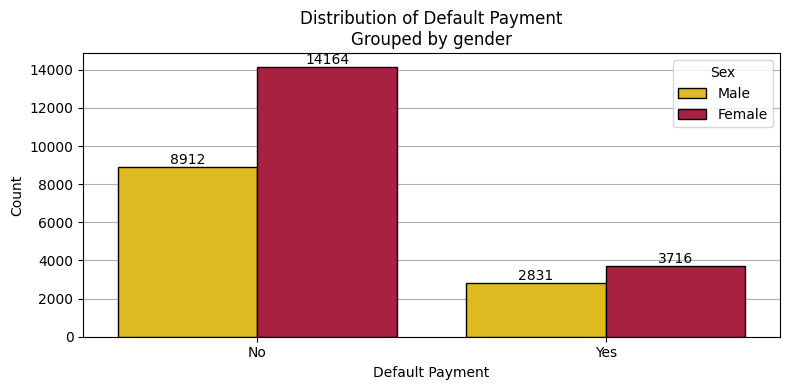

In [10]:
# Plot distribution of default payment, group by gender
labels_sex = ("Male", "Female")
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="SEX")
ax.bar_label(ax.containers[0], fmt="%.0f")  # Label count on bar
ax.bar_label(ax.containers[1], fmt="%.0f")

ax.set_title("Distribution of Default Payment\nGrouped by gender")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.legend(title="Sex", labels=labels_sex)

plt.tight_layout()
plt.savefig("images/default_payment_gender.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


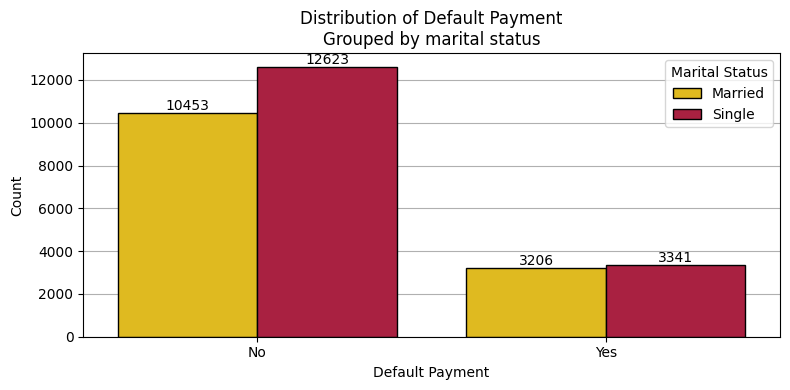

In [11]:
# Plot distribution of default payment, group by gender
labels_marital = ("Married", "Single", "Other")
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="MARRIAGE")
for c in ax.containers:
    ax.bar_label(c, fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment\nGrouped by marital status")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.legend(title="Marital Status", labels=labels_marital)

plt.tight_layout()
plt.savefig("images/default_payment_marital.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


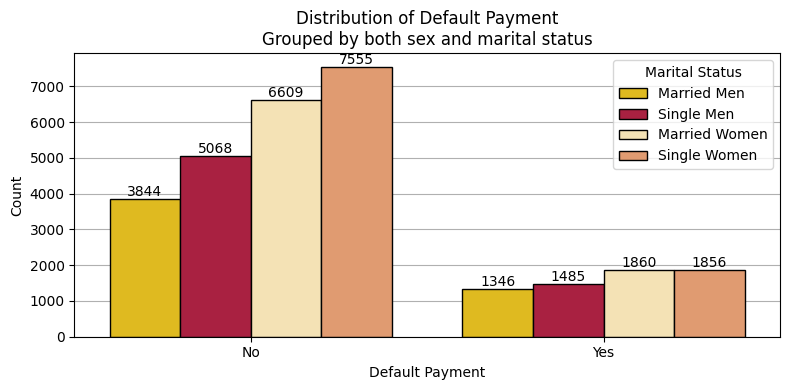

In [12]:
# Make new column for intersectional group combining sex and marital status
df["intersection"] = (df["SEX"].astype(str) + df["MARRIAGE"].astype(str)).astype(int)
labels_intersection = ("Married Men", "Single Men", "Married Women", "Single Women")

# Plot distribution of default payment, group by gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="intersection")
for c in ax.containers:
    ax.bar_label(c, fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment\nGrouped by both sex and marital status")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.legend(title="Marital Status", labels=labels_intersection)

plt.tight_layout()
plt.savefig("images/default_payment_both.eps", format="eps")
plt.show()